# SU(2) mini-BMN Hamiltonians

The following cell defines a function which creates the bosons, then it creates the SU(2) mini-BMN Hamiltonian. 
The function receives the number of bosons ($n_b$), the number of fermions ($n_f$), and the size of the bosons ($n$) as arguments.
For example, for 6 bosons that are $2 \times 2$ and 3 fermions, the function call would look like `bosonHamiltonians(6, 3, 8)`.
The function returns four Hamiltonians.

- First, an annihilation operator and identity matrix are created. Each of the 6 bosons are constructed by taking the Kronecker product of the annihilation operator with the identity matrix, in a specific order. For the $n^{th}$ boson, the annhiliation operator will be the $n^{th}$ term of the Kronecker product. Note that for an $n \times n$ boson, the identity matrix and annhilation operator are $n \times n$. The last term in the Kronecker product is an identity matrix of size $2^{n_f} \times 2^{n_f}$.
- For example, the first boson's Kronecker product would look like 
$$\hat{a}_n \otimes I_n \otimes I_n \otimes I_n \otimes I_n \otimes I_n \otimes I_{2^{n_f}}$$
where $\hat{a}$ is the annihilation operator and $I$ is the identity matrix and the subscript denotes the size of the matrix (subscript n means it has size $n \times n$ and subscript $2^{n_f}$ means it has size $2^{n_f} \times 2^{n_f}$).
- The 2nd boson would look like
$$I_n \otimes \hat{a}_n \otimes I_n \otimes I_n \otimes I_n \otimes I_n \otimes I_{2^{n_f}}$$
- Each of the 3 fermions are constructed by taking the Kronecker product of the annihilation operator with the identity matrix and Pauli `Z` matrix, in a specific order. Note that the annihilation operator and identity matrix are always size $2 \times 2$. The first term in the Kronecker product is an identity matrix of size $n^{n_b} \times n^{nb}$, where again, $n \times n$ is the boson size. For the $n^{th}$ fermion, the annhiliation operator will be the $n+1$ term of the Kronecker product and it will be followed by identity matrices and preceded by Pauli Z matrices.
- For example, the first fermion will look like
$$I_{n^{n_b}} \otimes \hat{a}_2 \otimes I_2 \otimes I_2$$
where, the subscript $2$ denotes a size of $2 \times 2$.
- The second fermion will look like 
$$I_{n^{n_b}} \otimes Z \otimes \hat{a}_2 \otimes I_2$$
where $Z$ is the Pauli `Z` matrix.
- The third fermion will look like 
$$I_{n^{n_b}} \otimes Z \otimes Z \otimes \hat{a}_2$$

## Use `qutip` to build the operators

In [1]:
# check versioning
from qutip.ipynbtools import version_table
version_table()

Software,Version
QuTiP,4.5.3
Numpy,1.20.1
SciPy,1.6.1
matplotlib,3.3.4
Cython,0.29.22
Number of CPUs,6
BLAS Info,Generic
IPython,7.21.0
Python,"3.9.2 | packaged by conda-forge | (default, Feb 21 2021, 05:02:46) [GCC 9.3.0]"
OS,posix [linux]


In [2]:
from qutip import *

### Precalculate bosonic and fermionic annihilation /operators

In [3]:
# cutoff of the modes for the bosonic space
L = 3

- Annihilation operator for bosons

In [4]:
a_b = destroy(L)

In [5]:
a_b

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[0.         1.         0.        ]
 [0.         0.         1.41421356]
 [0.         0.         0.        ]]

- Identity for single boson site

In [6]:
i_b = qeye(L)

In [7]:
i_b

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

- Annihilation for fermions (they are all $2 \times 2$ matrices)

In [8]:
a_f = destroy(2)

In [9]:
a_f

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 1.]
 [0. 0.]]

- Pauli `Z` matrix: $\sigma_Z$

In [10]:
sz = sigmaz()

In [11]:
sz

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

- Identity for fermionic space

In [12]:
i_f = qeye(2) 

In [13]:
i_f

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]

### Bosonic Hilbert space operators

In [14]:
N_bos = 6  # number of boson sites

In [15]:
import numpy as np

product_list = [i_b] * N_bos  # only the identity for bosons repeated N_bos times
a_b_list = []  # this will contain a1...a6
for i in np.arange(0,N_bos):  # loop over all bosonic operators
    operator_list = product_list.copy()  # all elements are the identity operator
    operator_list[i] = a_b  # the i^th element is now the annihilation operator for a single boson
    a_b_list.append(tensor(operator_list))  # do the outer product, add .unit() to tensor if you want it normalized but it will take a long 

In [16]:
len(a_b_list)

6

In [17]:
a_b_list[0]

Quantum object: dims = [[3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3]], shape = (729, 729), type = oper, isherm = False
Qobj data =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

To make it work in the combined space of fermionic and bosonic sites, we need to take a final outer product with the fermionic space identity operator. We will do it later.

### Fermionic Hilbert space operators

In [18]:
N_f = 3  # number of fermion sites

Create a list of operators just for the fermions

In [19]:
product_list = [i_f] * N_f  # only the identity for fermions repeated N_f times
a_f_list = []  # this will contain f1...f3
for i in np.arange(0,N_f):  # loop over all bosonic operators
    operator_list = product_list.copy()  # all elements are the identity operator
    operator_list[i] = a_f  # the i^th element is now the annihilation operator for a single fermion
    for j in np.arange(0,i):  # the 0:(i-1) elements are replaced by sigma_Z
        operator_list[j] = sz
    a_f_list.append(tensor(operator_list))  # do the outer product, add .unit() to tensor if you want it normalized but it will take a long 

In [20]:
len(a_f_list)

3

In [21]:
a_f_list[0]

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]

These fermionic operators need to be preceded by the identity operator for the bosonic space, before taking another outer product. We will do that later.

### Combine the two spaces

- Identity for bosonic space (dimension will be $L^{N_{bos}} \times L^{N_{bos}}$)

In [22]:
i_b_tot = tensor([qeye(L)]*N_bos) 

In [23]:
i_b_tot.shape

(729, 729)

In [24]:
i_b_tot.dims

[[3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3]]

- Identity for fermionic space (dimension will be $2^{N_f} \times 2^{N_f}$)

In [25]:
i_f_tot = tensor([qeye(2)]*N_f)

In [26]:
i_f_tot.shape

(8, 8)

In [27]:
i_f_tot.dims

[[2, 2, 2], [2, 2, 2]]

The $N_{bos}$ total bosonic operators and $N_f$ fermionic operators are constructed in a new list

In [28]:
op_list = []
for a in a_b_list:
    op_list.append(tensor(a,i_f_tot))
for a in a_f_list:
    op_list.append(tensor(i_b_tot,a))

In [29]:
len(op_list)

9

In [30]:
print([o.dims for o in op_list])

[[[3, 3, 3, 3, 3, 3, 2, 2, 2], [3, 3, 3, 3, 3, 3, 2, 2, 2]], [[3, 3, 3, 3, 3, 3, 2, 2, 2], [3, 3, 3, 3, 3, 3, 2, 2, 2]], [[3, 3, 3, 3, 3, 3, 2, 2, 2], [3, 3, 3, 3, 3, 3, 2, 2, 2]], [[3, 3, 3, 3, 3, 3, 2, 2, 2], [3, 3, 3, 3, 3, 3, 2, 2, 2]], [[3, 3, 3, 3, 3, 3, 2, 2, 2], [3, 3, 3, 3, 3, 3, 2, 2, 2]], [[3, 3, 3, 3, 3, 3, 2, 2, 2], [3, 3, 3, 3, 3, 3, 2, 2, 2]], [[3, 3, 3, 3, 3, 3, 2, 2, 2], [3, 3, 3, 3, 3, 3, 2, 2, 2]], [[3, 3, 3, 3, 3, 3, 2, 2, 2], [3, 3, 3, 3, 3, 3, 2, 2, 2]], [[3, 3, 3, 3, 3, 3, 2, 2, 2], [3, 3, 3, 3, 3, 3, 2, 2, 2]]]


### Precompute the position operators for the bosons, needed in the interaction term

In [31]:
x_list = []
for op in op_list[:N_bos]:
    x_list.append(1/np.sqrt(2)*(op.dag() + op))


In [32]:
len(x_list)==N_bos

True

## The full mini-BMN hamiltonian

- The quadratic terms

In [33]:
# Create the simple quartic Hamiltonian.
H_q = 0

for a in op_list[:N_bos]:
    H_q = H_q + a.dag() * a
    
for a in op_list[-N_f:]:
    H_q = H_q + (3./2) * a.dag() * a

# vacuum energy
H_q = H_q + 0.25*(2*N_bos-3*N_f-3)

  

In [34]:
H_q.shape

(5832, 5832)

In [35]:
H_q.dims

[[3, 3, 3, 3, 3, 3, 2, 2, 2], [3, 3, 3, 3, 3, 3, 2, 2, 2]]

- The interaction term for just bosons

In [36]:
V_b = x_list[2]*x_list[2]*x_list[3]*x_list[3] + \
    x_list[2]*x_list[2]*x_list[4]*x_list[4] + \
    x_list[1]*x_list[1]*x_list[3]*x_list[3] + \
    x_list[1]*x_list[1]*x_list[5]*x_list[5] + \
    x_list[0]*x_list[0]*x_list[4]*x_list[4] + \
    x_list[0]*x_list[0]*x_list[5]*x_list[5] - \
2*x_list[0]*x_list[2]*x_list[3]*x_list[5] - \
2*x_list[0]*x_list[1]*x_list[3]*x_list[4] - \
2*x_list[1]*x_list[2]*x_list[4]*x_list[5]

In [37]:
V_b

Quantum object: dims = [[3, 3, 3, 3, 3, 3, 2, 2, 2], [3, 3, 3, 3, 3, 3, 2, 2, 2]], shape = (5832, 5832), type = oper, isherm = True
Qobj data =
[[1.5 0.  0.  ... 0.  0.  0. ]
 [0.  1.5 0.  ... 0.  0.  0. ]
 [0.  0.  1.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 6.  0.  0. ]
 [0.  0.  0.  ... 0.  6.  0. ]
 [0.  0.  0.  ... 0.  0.  6. ]]

- The interaction term mixing bosons and fermions

In [38]:
fermions = op_list[-N_f:]
V_bf = (2j/np.sqrt(2))* \
        ( (x_list[0] - 1j*x_list[3]) * fermions[1].dag() * fermions[2].dag() \
        + (x_list[1] - 1j*x_list[4]) * fermions[2].dag() * fermions[0].dag() \
        + (x_list[2] - 1j*x_list[5]) * fermions[0].dag() * fermions[1].dag() \
        - (x_list[0] + 1j*x_list[3]) * fermions[2] * fermions[1] \
        - (x_list[1] + 1j*x_list[4]) * fermions[0] * fermions[2] \
        - (x_list[2] + 1j*x_list[5]) * fermions[1] * fermions[0] )

In [39]:
V_bf

Quantum object: dims = [[3, 3, 3, 3, 3, 3, 2, 2, 2], [3, 3, 3, 3, 3, 3, 2, 2, 2]], shape = (5832, 5832), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]

### Combining the terms and adding a coupling

In [40]:
g2N = 0.2  # this is the 't hooft coupling
N = 2  # we fix N=2 for SU(2)
g2 = g2N/N
H = H_q + g2*V_b + np.sqrt(g2)*V_bf

## Getting the eigenstates

* Ground state of the quadratic free Hamiltonian should be zero

In [42]:
print("The ground state energy of the free Hamiltonian:")
if L<4:
    print(H_q.eigenenergies(eigvals=20))
else:
    print(H_q.eigenenergies(eigvals=20,sparse=True))

The ground state energy of the free Hamiltonian:
[0.  1.  1.  1.  1.  1.  1.  1.5 1.5 1.5 2.  2.  2.  2.  2.  2.  2.  2.
 2.  2. ]


In [44]:
if L==2:
    eig = H.eigenenergies()
else:   
    eig = H.eigenenergies(eigvals=10, sparse=True)

In [45]:
print(f"The ground state energy (H): {eig[0]}")

The ground state energy (H): -0.0006030129665111042


In [47]:
print(f"The 10 lowest eigen energies at lambda={g2N}: {eig}")

The 10 lowest eigen energies at lambda=0.2: [-6.03012967e-04  1.00118494e+00  1.00118494e+00  1.00118494e+00
  1.04289170e+00  1.04289170e+00  1.04289170e+00  1.58508857e+00
  1.58508857e+00  1.58508857e+00]


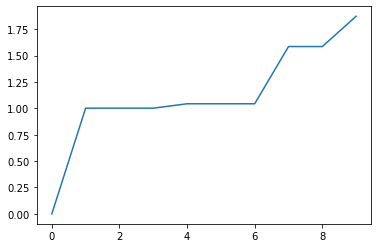

In [ ]:
import matplotlib.pyplot as plt

plt.plot(eig)

## The gauge generator operators

These are similar to the bosonic BMN case, but with the addition of the fermionic operators:

$$ \hat{G}_\alpha = i\sum_{\beta,\gamma}\epsilon_{\alpha\beta\gamma} \left( \hat{a}_{1\beta}^\dagger\hat{a}_{1\gamma} + \hat{a}_{2\beta}^\dagger\hat{a}_{2\gamma} + \hat{\xi}_\beta^\dagger\hat{\xi}_\gamma \right).  $$

* Save the bosonic operators in a separate list for convenience

In [ ]:
bosons = op_list[:N_bos]

* Make a list with the 3 generators

In [ ]:
g_list = [0]*3
g_list[0] = 1j * (bosons[1].dag()*bosons[2]-bosons[2].dag()*bosons[1] \
                 +bosons[4].dag()*bosons[5]-bosons[5].dag()*bosons[4] \
                 +fermions[1].dag()*fermions[2] - fermions[2].dag()*fermions[1])


In [ ]:
g_list[1] = 1j * (bosons[2].dag()*bosons[0]-bosons[0].dag()*bosons[2] \
                 +bosons[5].dag()*bosons[3]-bosons[3].dag()*bosons[5] \
                 +fermions[2].dag()*fermions[0] - fermions[0].dag()*fermions[2])


In [ ]:
g_list[2] = 1j * (bosons[0].dag()*bosons[1]-bosons[1].dag()*bosons[0] \
                 +bosons[3].dag()*bosons[4]-bosons[4].dag()*bosons[3] \
                 +fermions[0].dag()*fermions[1] - fermions[1].dag()*fermions[0])


In [ ]:
g_sum = sum([g*g for g in g_list])
g_sum 

Quantum object: dims = [[3, 3, 3, 3, 3, 3, 2, 2, 2], [3, 3, 3, 3, 3, 3, 2, 2, 2]], shape = (5832, 5832), type = oper, isherm = True
Qobj data =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

### Measure the sum of the square of the operators on the groundstate

In [ ]:
eigv0_H, eigk0_H = H.groundstate(sparse=True)

In [ ]:
print(f"The ground state energy (H): {eigv0_H}")

The ground state energy (H): -0.0006030129665145972


In [ ]:
gs = expect(g_sum,eigk0_H)

In [ ]:
print(f"Ground state gauge singlet violation (H): {gs}")

Ground state gauge singlet violation (H): 0.0004809533501861291


## Modified Hamiltonian: adding an energy penalty term

We can change the Hamiltonian to add a term proportional to the gauge singlet constraint violation in order to penalize (with a higher energy) those states which are not gauge singlets.
$$ \tilde{H} = H + \Lambda \sum_\alpha \hat{G}^2_\alpha $$

In [ ]:
# we choose the penalty coefficient equal to the cutoff for the bosons
penalty = L
H_l = H + penalty*g_sum

The ground state will not change much if it is gauge invariant as expected

In [ ]:
eigv0_H_l, eigk0_H_l = H_l.groundstate(sparse=True)

In [ ]:
print(f"The ground state energy (H_l): {eigv0_H_l}")

The ground state energy (H_l): -0.00033051820951101435


Its gauge-singlet violation should be smaller

In [ ]:
gs = expect(g_sum,eigk0_H_l)

In [ ]:
print(f"Ground state gauge singlet violation (H_l): {gs}")

Ground state gauge singlet violation (H_l): 2.6417848436422258e-05


## The rotation generator operators

We need to combine the position and momentum operators of the two bosonic matrices (6 total degrees of freedom):

$$ \hat{Z} = \frac{X_1-iX_2}{\sqrt{2}} $$

and 

$$\hat{P}_Z = \frac{\hat{P}_1-i\hat{P}_2}{\sqrt{2}}$$

### Precompute the momentum operators for the bosons, needed for the generators

In [ ]:
p_list = []
for op in op_list[:N_bos]:
    p_list.append(1j/np.sqrt(2)*(op.dag() - op))


### Precompute the combinations of position and momentum operators to manifest the SO(2) symmetry

In [ ]:
z_list = [0]*3
z_list[0] = 1/np.sqrt(2)*(x_list[0]-1j*x_list[3])
z_list[1] = 1/np.sqrt(2)*(x_list[1]-1j*x_list[4])
z_list[2] = 1/np.sqrt(2)*(x_list[2]-1j*x_list[5])

In [ ]:
pz_list = [0]*3
pz_list[0] = 1/np.sqrt(2)*(p_list[0]-1j*p_list[3])
pz_list[1] = 1/np.sqrt(2)*(p_list[1]-1j*p_list[4])
pz_list[2] = 1/np.sqrt(2)*(p_list[2]-1j*p_list[5])

### Compute the generators for the SO(2) rotations

$$\hat{M} = \sum_\alpha \big[ i(\hat{Z}_\alpha\hat{P}_{Z\alpha}^\dagger-\hat{Z}_\alpha^\dagger\hat{P}_{Z\alpha}) -\frac{1}{2}\hat{\xi}_\alpha^\dagger\hat{\xi}_\alpha \big]$$

In [ ]:
m_list = [0]*3
m_list[0] = 1j*(z_list[0]*pz_list[0].dag()-z_list[0].dag()*pz_list[0]) - 0.5*fermions[0].dag()*fermions[0]
m_list[1] = 1j*(z_list[1]*pz_list[1].dag()-z_list[1].dag()*pz_list[1]) - 0.5*fermions[1].dag()*fermions[1]
m_list[2] = 1j*(z_list[2]*pz_list[2].dag()-z_list[2].dag()*pz_list[2]) - 0.5*fermions[2].dag()*fermions[2]

In [ ]:
m_sum = sum([m for m in m_list])
m_sum

Quantum object: dims = [[3, 3, 3, 3, 3, 3, 2, 2, 2], [3, 3, 3, 3, 3, 3, 2, 2, 2]], shape = (5832, 5832), type = oper, isherm = True
Qobj data =
[[ 0. +0.j  0. +0.j  0. +0.j ...  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j ...  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j ...  0. +0.j  0. +0.j  0. +0.j]
 ...
 [ 0. +0.j  0. +0.j  0. +0.j ... -1.5+0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j ...  0. +0.j -1.5+0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j ...  0. +0.j  0. +0.j -1.5+0.j]]

### Measure the expectation value on the ground state of the unperturbed Hamiltonian

In [ ]:
gm = expect(m_sum,eigk0_H)

In [ ]:
print(f"Ground state rotation generator value (H): {gm}")

Ground state rotation generator value (H): -6.301514317054971e-05


### Measure $\hat{G}^2$ and $\hat{M}$ for the different Hamiltonians

In [ ]:
print(f"--- Unperturbed Hamiltonian H --- coupling lambda={g2N}")
print("Eigenenergies:",eigv0_H)
print("Expectation values of H:",expect(H,eigk0_H))
print("Expectation values G^2:",expect(g_sum,eigk0_H))
print("Expectation values M:",expect(m_sum,eigk0_H))

--- Unperturbed Hamiltonian H --- coupling lambda=0.2
Eigenenergies: -0.0006030129665145972
Expectation values G^2: 0.0004809533501861291
Expectation values M: -6.301514317054971e-05


In [ ]:
print(f"--- Perturbed Hamiltonian H_l = H+L*G^2 --- coupling lambda={g2N}")
print("Eigenenergies:",eigv0_H_l)
print("Expectation values of H:",expect(H,eigk0_H_l))
print("Expectation values G^2:",expect(g_sum,eigk0_H_l))
print("Expectation values M:",expect(m_sum,eigk0_H_l))

--- Perturbed Hamiltonian H_l = H+L*G^2 --- coupling lambda=0.2
Eigenenergies: -0.00033051820951101435
Expectation values G^2: 2.6417848436422258e-05
Expectation values M: -7.679359635720775e-05


Look at a few lowest eigenstates for the unperturbed Hamiltonian

In [ ]:
eigv_H, eigk_H = H.eigenstates(sparse=True, sort='low', eigvals=4)

In [ ]:
print(f"--- Unperturbed Hamiltonian H --- coupling lambda={g2N}")
print("Eigenenergies:",eigv_H)
print("Expectation values of H:",expect(H,eigk_H))
print("Expectation values G^2:",expect(g_sum,eigk_H))
print("Expectation values M:",expect(m_sum,eigk_H))

--- Unperturbed Hamiltonian H --- coupling lambda=0.2
Eigenenergies: [-6.03012967e-04  1.00118494e+00  1.00118494e+00  1.00118494e+00]
Expectation values G^2: [4.80953350e-04 2.00329965e+00 2.00329965e+00 2.00329965e+00]
Expectation values M: [-6.30151432e-05 -1.00215309e+00 -1.00369992e+00 -9.91709524e-01]


Look at a few lowest eigenstates for the perturbed Hamiltonian with $\hat{G}^2$

In [ ]:
eigv_H_l, eigk_H_l = H_l.eigenstates(sparse=True, sort='low', eigvals=4)

In [ ]:
print(f"--- Perturbed Hamiltonian H_l = H+L*G^2 --- coupling lambda={g2N}")
print("Eigenenergies:",eigv_H_l)
print("Expectation values of H:",expect(H,eigk_H_l))
print("Expectation values G^2:",expect(g_sum,eigk_H_l))
print("Expectation values M:",expect(m_sum,eigk_H_l))

--- Perturbed Hamiltonian H_l = H+L*G^2 --- coupling lambda=0.2
Eigenenergies: [-3.30518210e-04  1.89726445e+00  1.99369774e+00  2.10530864e+00]
Expectation values G^2: [2.64178484e-05 1.09066482e-03 5.16605973e-04 1.52593818e-03]
Expectation values M: [-7.67935964e-05 -1.68689266e+00  1.65855282e+00 -2.40586356e-02]


## Modified Hamiltonian (part II): adding a penalty term for angular momentum

We will add a new term to the Hamiltonian:
$$ \hat{H}' = \hat{H} + c\sum_\alpha\hat{G}_\alpha^2 + c' (\hat{M}-J)^2. $$

In [ ]:
# we choose the penalty coefficient equal to the cutoff for the bosons
penalty_l = L
penalty_m = 1
J = 0  # {0,0.5}
H_ml = H + penalty_l*g_sum + penalty_m*(m_sum - J)**2 

In [ ]:
H_ml

Quantum object: dims = [[3, 3, 3, 3, 3, 3, 2, 2, 2], [3, 3, 3, 3, 3, 3, 2, 2, 2]], shape = (5832, 5832), type = oper, isherm = True
Qobj data =
[[ 0.15+0.j  0.  +0.j  0.  +0.j ...  0.  +0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j  7.65+0.j  0.  +0.j ...  0.  +0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  7.65+0.j ...  0.  +0.j  0.  +0.j  0.  +0.j]
 ...
 [ 0.  +0.j  0.  +0.j  0.  +0.j ... 23.85+0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j ...  0.  +0.j 23.85+0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j ...  0.  +0.j  0.  +0.j 19.35+0.j]]

### Compute the ground state energy

Find the lowest eigenstates and compute the expectation values of $\hat{G}^2$ and $\hat{M}$

Only the groundstate

In [ ]:
eigv0_H_ml, eigk0_H_ml = H_ml.groundstate(sparse=True)

In [ ]:
print(f"--- Perturbed Hamiltonian H_ml = H+L*G^2+M^2 --- coupling lambda={g2N}")
print("Eigenenergies:",eigv0_H_ml)
print("Expectation values of H:",expect(H,eigk0_H_ml))
print("Expectation values G^2:",expect(g_sum,eigk0_H_ml))
print("Expectation values M:",expect(m_sum,eigk0_H_ml))

--- Perturbed Hamiltonian H_ml = H+L*G^2+M^2 --- coupling lambda=0.2
Eigenenergies: 0.013580332986172988
Expectation values G^2: 6.0417171978336406e-05
Expectation values M: -0.0005576706908361649


The 4 lowest eigenstates

In [ ]:
eigv_H_ml, eigk_H_ml = H_ml.eigenstates(sparse=True, sort='low', eigvals=4)

In [ ]:
print(f"--- Perturbed Hamiltonian H_ml = H+L*G^2+M^2 --- coupling lambda={g2N}")
print("Eigenenergies:",eigv_H_ml)
print("Expectation values of H:",expect(H,eigk_H_ml))
print("Expectation values G^2:",expect(g_sum,eigk_H_ml))
print("Expectation values M:",expect(m_sum,eigk_H_ml))

--- Perturbed Hamiltonian H_ml = H+L*G^2+M^2 --- coupling lambda=0.2
Eigenenergies: [0.01358033 2.14710217 3.34122335 4.13706044]
Expectation values G^2: [6.04171720e-05 2.19514709e-03 2.53554747e-03 9.36086506e-03]
Expectation values M: [-0.00055767 -0.0026139   0.47264974 -0.00826359]
